### Syed Muhammad Omer Khalid 
#### Assignment # 3
#### Section G

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from sklearn.metrics import mean_squared_error
import scipy.interpolate as spi
import numpy as np

In [51]:
ans = pd.read_csv("anscombe.csv")

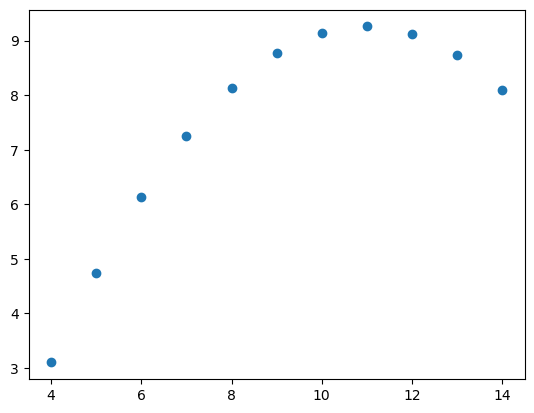

In [52]:
plt.plot(ans[ans.group == "II"].x,ans[ans.group == "II"].y,'o')

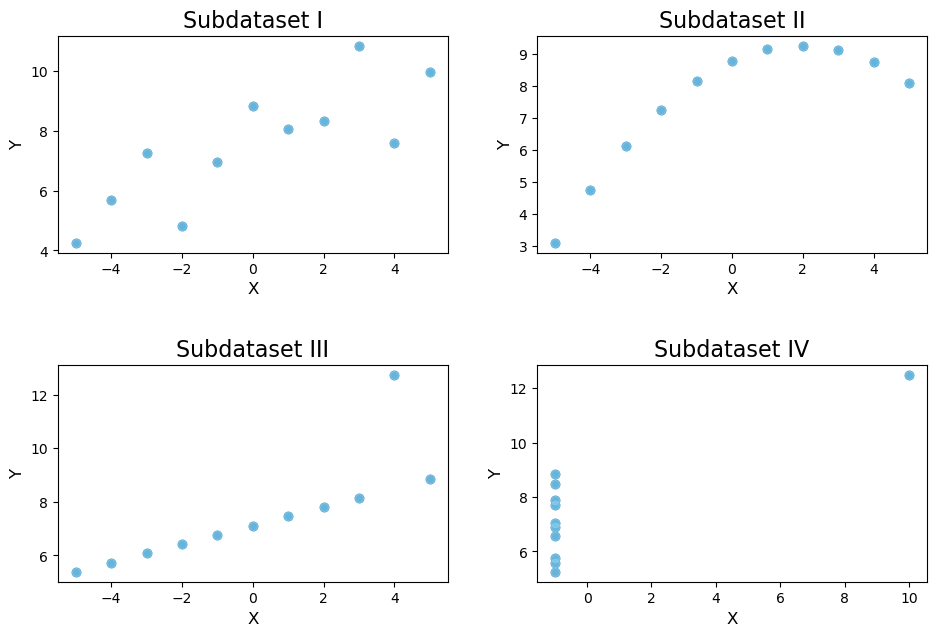

In [53]:

fig, axes = plt.subplots(2, 2, figsize=(10, 7))


for i, group in enumerate(["I", "II", "III", "IV"]):
    x = ans[ans.group == group]["x"].values
    y = ans[ans.group == group]["y"].values
    x = x - x.mean()
    ax = axes[i // 2, i % 2]
    ax.scatter(x, y)
    ax.scatter(x, y, color='skyblue', alpha=0.7)  
    ax.set_title(f"Subdataset {group}", fontsize=16)  
    ax.set_xlabel("X", fontsize=12)  
    ax.set_ylabel("Y", fontsize=12)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
    
plt.tight_layout(pad=3)
plt.show()


In [54]:
 
def rmse(y_actual, y_predicted):
    
    mse = mean_squared_error(y_actual, y_predicted)
    
    return math.sqrt(mse)


In [55]:
ans = pd.read_csv('anscombe.csv')

x = np.sort(ans[ans.group == 'II']['x'].values)

y= np.sort(ans[ans.group == 'II']['y'].values)

In [56]:

x = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

y = np.array([3.1, 4.74, 6.13, 7.26, 8.1, 8.14, 8.74, 8.77, 9.13, 9.14, 9.26])

x_subset = np.array([8, 9, 10, 11, 12, 13])

y_subset = np.array([8.1, 8.14, 8.74, 8.77, 9.13, 9.14])

# Approxmimation via interpolation 

In [57]:
lag_poly = lagrange(x_subset, y_subset)
y_lag_pred = lag_poly(x)
rmse_lag = rmse(y, y_lag_pred)
print("Lagrange ")
print(rmse_lag)

Lagrange 
100.40959022467709


# Approximation via Least square

In [58]:
coef_lsm = np.polyfit(x_subset, y_subset, 3)

poly_lsm = np.poly1d(coef_lsm)

y_lsm_pred = poly_lsm(x)

rmse_lsm = rmse(y, y_lsm_pred)
print("LSM")
print(rmse_lsm)


LSM
2.7165657161322896


# Comparison and conclusion

The lower RMSE by the least square method shows a better fit to overall trend observed in data points in subdataset II. This shows that the least square polynomial offers a more reliable and generalized model across the entire dataset, resulting in enhanced predictive capabilites.

The RMSE for the lagrange interpolation is very high, which suggests an excessive degree of overfitting to the data points with dataset 2, resulting to perform very poorly on the entire dataset. The high RMSE indicates large errors when the model is applied to points outside of the subset it was a fit as well.

In summary, while the least squares method delivers a robust and accurate fit for the dataset, the Lagrange interpolation suffers from overfitting issues, rendering it ineffective for extrapolation tasks